### Importing Relevant Packages

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [4]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [5]:
df_comp['market_value']=df_comp.spx

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [7]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [8]:
df['wn'] = wn

In [9]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.403832
std,292.559287,291.910356
min,438.920000,62.703450
25%,914.620000,895.077700
50%,1144.650000,1091.110121
75%,1316.280729,1287.934792
max,1570.252238,2186.067924


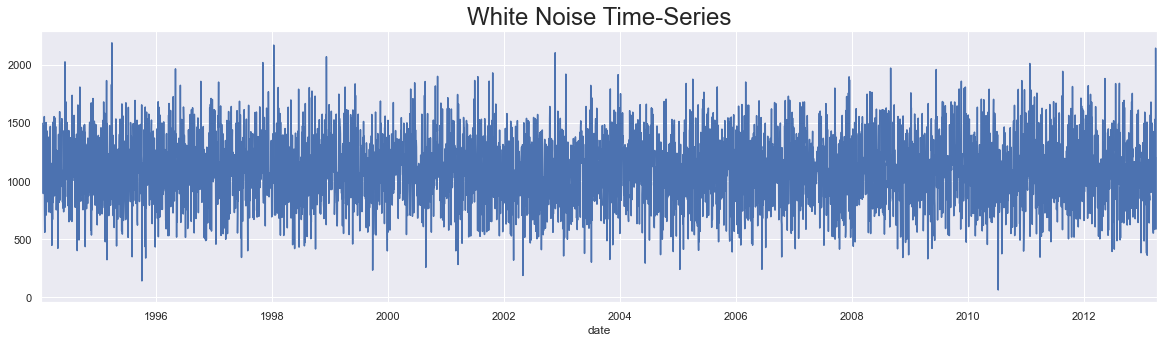

In [10]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

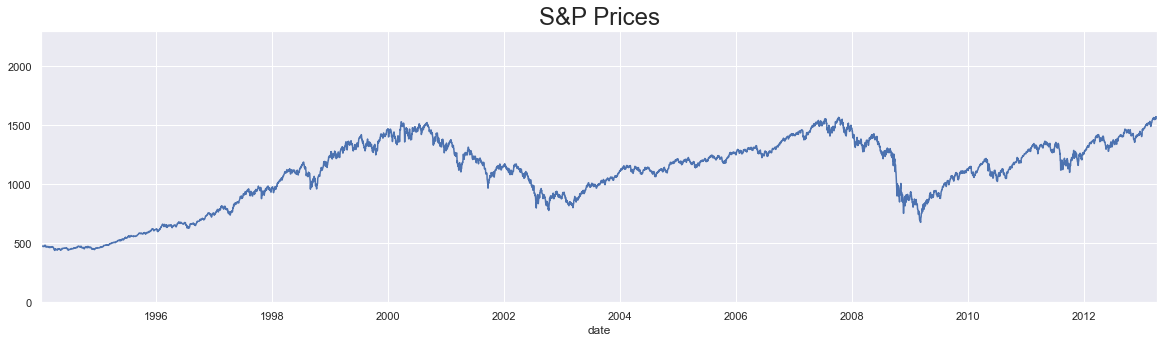

In [11]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [12]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [13]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [14]:
df['rw'] = rw.price

In [15]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1159.370699,1122.139662
1994-01-10,475.27,1006.892898,1080.347860
1994-01-11,474.13,1107.577626,1082.095245
1994-01-12,474.17,1496.337780,1083.639265
1994-01-13,472.47,1309.615626,1067.146255


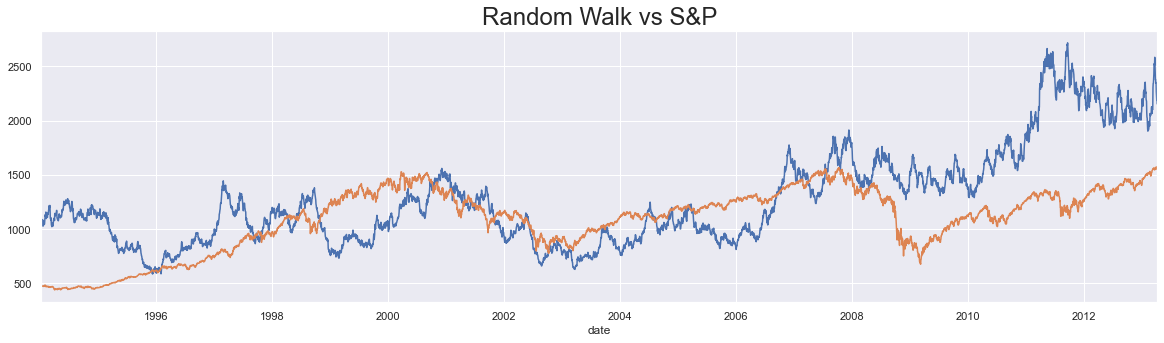

In [16]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [17]:
sts.adfuller(df.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [18]:
sts.adfuller(df.wn)

(-51.56661246712212,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70793.74852647228)

In [19]:
sts.adfuller(df.rw)

(-1.32860739276897,
 0.6159849181617392,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

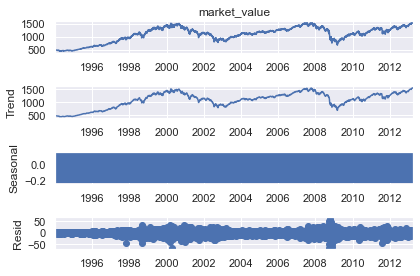

In [25]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()
# no seasonality of the data

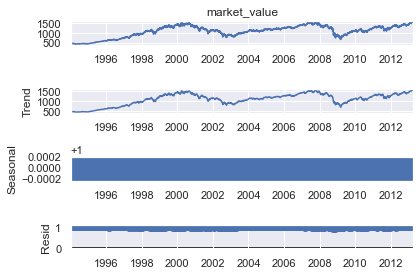

In [20]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()
# no seasonality of the data

### ACF

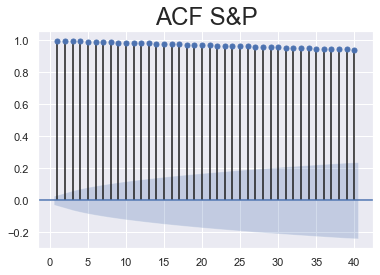

In [26]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

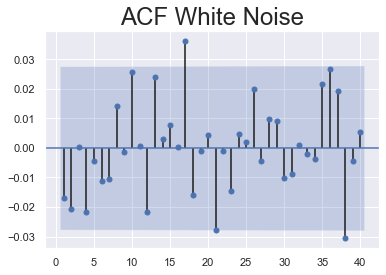

In [28]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF White Noise", size = 24)
plt.show()

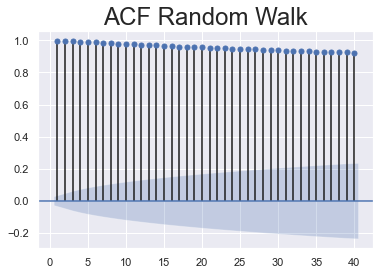

In [29]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF Random Walk", size = 24)
plt.show()

### PACF

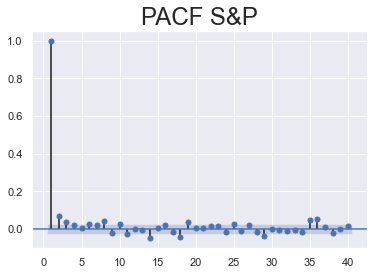

In [22]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

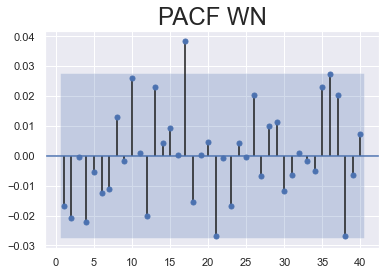

In [23]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

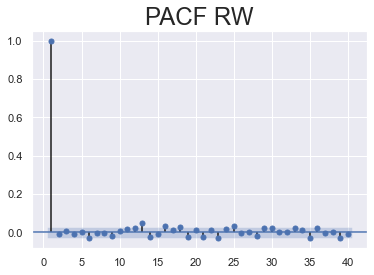

In [30]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()